In [1]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import talib 
from dateutil.relativedelta import relativedelta
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

from Tool_v1 import *


# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
yf.pdr_override()

In [2]:
from itertools import combinations
c = (1,2,3,4,5,6,7,8,9,10,11,12) 
i=0
result=[]
while i<len(c):
    for j in combinations(c,i):
        #print(list(j))
        result.append(list(j))
    i+=1 
print(len(result))

4095


In [3]:
start="2020-12-31"
end="2023-09-30"
name="AAPL"

#MACD619RSI21_8020
stock_data=pct_change(name,start,end)
stock_data=stock_data.copy()

#指标运算
stock_data=MACD_short(stock_data)
stock_data=RSI(stock_data)
stock_data=RSI_MACD(stock_data,21,80,20)
stock_data= my_rsi(stock_data, 21)

#y值
#stock_data["y"]=np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)


del stock_data["real_situation"]
del stock_data["Volume"]
del stock_data["Adj Close"]
del stock_data["EMA6"]
del stock_data["Close"]
del stock_data["EMA19"]
del stock_data["RSI6"]
#del stock_data["RSI14"]
# del stock_data["re_close"]
# del stock_data["re_open"]
del stock_data["Low"]
#del stock_data["High"]
# del stock_data["log_return"] 
# del stock_data["Close_price_percentage"]
# del stock_data["MACD"]
del stock_data["DIF"]
# del stock_data["Position"]

stock_data = stock_data.dropna()


print(stock_data)

#y = np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)

y = np.where(stock_data['Open'].shift(-1) > stock_data['Open'],1,-1)

print(y)


                  Open        High  Close_price_percentage  log_return  \
Date                                                                     
2021-02-03  135.759995  135.770004               -0.007778   -0.007809   
2021-02-04  136.300003  137.399994                0.025758    0.025432   
2021-02-05  137.350006  137.419998               -0.004586   -0.004596   
2021-02-08  136.029999  136.960007                0.001097    0.001096   
2021-02-09  136.619995  137.880005               -0.006574   -0.006595   
...                ...         ...                     ...         ...   
2023-09-25  174.199997  176.970001                0.007380    0.007353   
2023-09-26  174.820007  175.199997               -0.023398   -0.023677   
2023-09-27  172.619995  173.039993               -0.008897   -0.008937   
2023-09-28  169.339996  172.029999                0.001526    0.001524   
2023-09-29  172.020004  173.070007                0.003046    0.003042   

            re_close   re_open      M

In [4]:
#stock_data = stock_data.loc[:,["re_close", "re_open", "my_rsi", "Position", "RSI21", "up_or_down","y"]]
stock_data.head()

print(stock_data.iloc[:, [2,8,9]])

            Close_price_percentage      RSI14      RSI21
Date                                                    
2021-02-03               -0.007778  51.839397  54.368370
2021-02-04                0.025758  56.576157  57.348233
2021-02-05               -0.004586  55.502630  56.639046
2021-02-08                0.001097  55.718089  56.772694
2021-02-09               -0.006574  54.027799  55.691336
...                            ...        ...        ...
2023-09-25                0.007380  44.397096  44.853887
2023-09-26               -0.023398  38.386669  40.668875
2023-09-27               -0.008897  36.415084  39.241208
2023-09-28                0.001526  37.007197  39.619429
2023-09-29                0.003046  38.245764  40.398541

[669 rows x 3 columns]


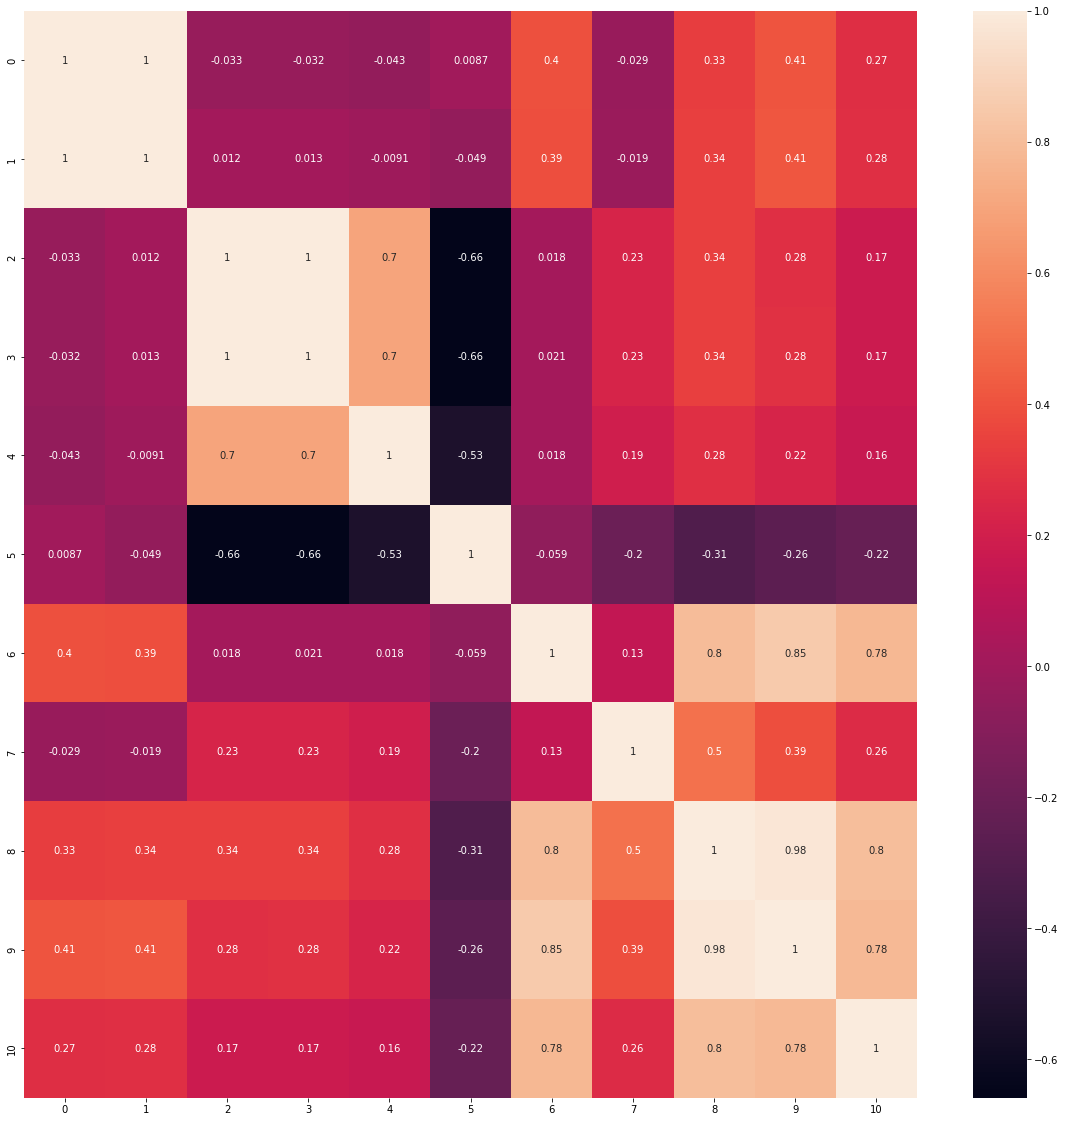

In [5]:

cor = np.corrcoef(stock_data.T)
plt.figure(figsize=(20, 20))
sns.heatmap(cor, annot=True)
plt.show()

In [6]:
#del stock_data["y"]
num_columns = stock_data.shape[1]+1
print(num_columns)

12


In [7]:
for i in range(1,num_columns):
    #standardScaler
    X = stock_data.iloc[:,:i]
    #print(i,"features below:")
   # print(X)
    st_x= StandardScaler()  
    X= st_x.fit_transform(X)  
    
    #split dataset
    split = int(0.7*len(stock_data))
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
    # 设置正则化类型（L1, L2, Elastic Net）
    penalty = 'l2' 

    # 设置正则化强度（C）
    C = 0.005

    #logistic regression
    model = LogisticRegression(penalty =penalty, C=C) 
    #logistic regression
    #model = LogisticRegression(max_iter=20000)
    model = model.fit (X_train,y_train)
    probability = model.predict_proba(X_test)
    predicted = model.predict(X_test)
    

    
    #result
    #print(metrics.classification_report(y_test, predicted))
    #print(metrics.confusion_matrix(y_test, predicted)) 
    print(i,": ","model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))
    print()

1 :  model_score:  0.5074626865671642  f1_score:  0.48704663212435234  accuary_score:  0.5074626865671642

2 :  model_score:  0.5174129353233831  f1_score:  0.5125628140703518  accuary_score:  0.5174129353233831

3 :  model_score:  0.7860696517412935  f1_score:  0.8018433179723501  accuary_score:  0.7860696517412935

4 :  model_score:  0.7860696517412935  f1_score:  0.8018433179723501  accuary_score:  0.7860696517412935

5 :  model_score:  0.835820895522388  f1_score:  0.8506787330316742  accuary_score:  0.835820895522388

6 :  model_score:  0.8656716417910447  f1_score:  0.88  accuary_score:  0.8656716417910447

7 :  model_score:  0.8606965174129353  f1_score:  0.875  accuary_score:  0.8606965174129353

8 :  model_score:  0.8706467661691543  f1_score:  0.8839285714285715  accuary_score:  0.8706467661691543

9 :  model_score:  0.8557213930348259  f1_score:  0.8711111111111111  accuary_score:  0.8557213930348259

10 :  model_score:  0.8557213930348259  f1_score:  0.8711111111111111  acc

In [8]:


for i in range(1,num_columns):
    #normalization MinMaxScalar
    X = stock_data.iloc[:,:i]
    st_x= MinMaxScaler()   
    X= st_x.fit_transform(X)  
    
    
    #split dataset
    split = int(0.7*len(stock_data))
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
    #logistic regression
    model = LogisticRegression(max_iter=20000)
    model = model.fit (X_train,y_train)
    probability = model.predict_proba(X_test)
    predicted = model.predict(X_test)
    #result
    #print(metrics.classification_report(y_test, predicted))
    #print(metrics.confusion_matrix(y_test, predicted)) 
    print(i,": ","model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))

1 :  model_score:  0.46766169154228854  f1_score:  0.38857142857142857  accuary_score:  0.46766169154228854
2 :  model_score:  0.4975124378109453  f1_score:  0.42937853107344637  accuary_score:  0.4975124378109453
3 :  model_score:  0.7661691542288557  f1_score:  0.7751196172248803  accuary_score:  0.7661691542288557
4 :  model_score:  0.7661691542288557  f1_score:  0.7772511848341234  accuary_score:  0.7661691542288557
5 :  model_score:  0.835820895522388  f1_score:  0.8465116279069769  accuary_score:  0.835820895522388
6 :  model_score:  0.845771144278607  f1_score:  0.8584474885844747  accuary_score:  0.845771144278607
7 :  model_score:  0.8507462686567164  f1_score:  0.8623853211009175  accuary_score:  0.8507462686567164
8 :  model_score:  0.8507462686567164  f1_score:  0.8623853211009175  accuary_score:  0.8507462686567164
9 :  model_score:  0.8507462686567164  f1_score:  0.8623853211009175  accuary_score:  0.8507462686567164
10 :  model_score:  0.8507462686567164  f1_score:  0.86

In [9]:
#standardScaler
X = stock_data.iloc[:,:num_columns]
st_x= StandardScaler()  
X= st_x.fit_transform(X)  
    
#PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
    
#split dataset
split = int(0.7*len(stock_data))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
#logistic regression
model = LogisticRegression(max_iter=20000)
model = model.fit (X_train,y_train)
probability = model.predict_proba(X_test)
predicted = model.predict(X_test)
#result
#print(metrics.classification_report(y_test, predicted))
#print(metrics.confusion_matrix(y_test, predicted)) 
print("model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))

model_score:  0.835820895522388  f1_score:  0.8436018957345973  accuary_score:  0.835820895522388


In [10]:
#normalization MinMaxScalar
X = stock_data.iloc[:,:num_columns]
st_x= MinMaxScaler()   
X= st_x.fit_transform(X)  
    
#PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
    
#split dataset
split = int(0.7*len(stock_data))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

#logistic regression
model = LogisticRegression(max_iter=20000)
model = model.fit (X_train,y_train)
probability = model.predict_proba(X_test)
predicted = model.predict(X_test)
#result
#print(metrics.classification_report(y_test, predicted))
#print(metrics.confusion_matrix(y_test, predicted)) 
print("model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))

model_score:  0.6368159203980099  f1_score:  0.6696832579185521  accuary_score:  0.6368159203980099


                  Open        High  Close_price_percentage  log_return  \
Date                                                                     
2021-02-03  135.759995  135.770004               -0.007778   -0.007809   
2021-02-04  136.300003  137.399994                0.025758    0.025432   
2021-02-05  137.350006  137.419998               -0.004586   -0.004596   
2021-02-08  136.029999  136.960007                0.001097    0.001096   
2021-02-09  136.619995  137.880005               -0.006574   -0.006595   
...                ...         ...                     ...         ...   
2023-09-25  174.199997  176.970001                0.007380    0.007353   
2023-09-26  174.820007  175.199997               -0.023398   -0.023677   
2023-09-27  172.619995  173.039993               -0.008897   -0.008937   
2023-09-28  169.339996  172.029999                0.001526    0.001524   
2023-09-29  172.020004  173.070007                0.003046    0.003042   

            re_close   re_open      M

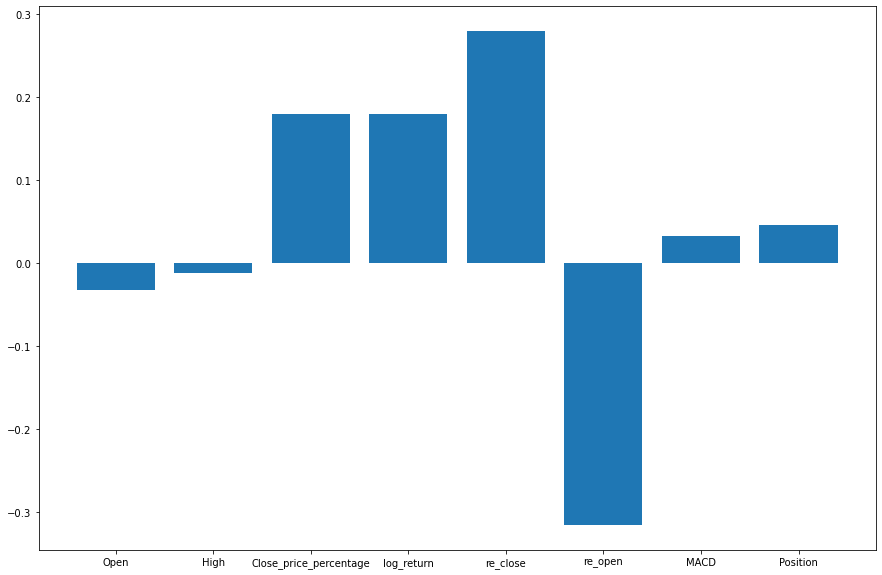

model_score:  0.8706467661691543  f1_score:  0.8839285714285715  accuary_score:  0.8706467661691543


In [11]:
#num_columns
#X = stock_data.iloc[:,:num_columns]
X = stock_data.iloc[:,:8]
print(X)
column_names = X.columns.tolist()
st_x= StandardScaler()  
X= st_x.fit_transform(X)  
    
#split dataset
split = int(0.7*len(stock_data))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
# 设置正则化类型（L1, L2, Elastic Net）
penalty = 'l2' 

    # 设置正则化强度（C）
C = 0.005

    #logistic regression
model = LogisticRegression(penalty =penalty, C=C) 

#logistic regression
# model = LogisticRegression(max_iter=20000)
model = model.fit (X_train,y_train)

probability = model.predict_proba(X_test)
predicted = model.predict(X_test)
    
# get importance
importance = model.coef_[0]
print(importance)
# summarize feature importance
count=0
for i in importance:
    print('Score:%.d %.5f' % (count,i))
    count+=1
# plot feature importance

plt.figure(figsize=(15,10))
plt.bar(column_names, importance)
plt.savefig('logistic_featureimp.png')
plt.show()
    
#result
#print(metrics.classification_report(y_test, predicted))
#print(metrics.confusion_matrix(y_test, predicted)) 
print("model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))

In [12]:
count = len(stock_data[stock_data["Position"] == 1])
print(count)

326


In [13]:
a=list(stock_data["Position"]==1)

In [14]:
count=0
for i in a:
    if i ==1:
        count+=1
        
        

In [15]:
print(count)

326
